# REDSoX polarimeter effective area and figure of merit

In [22]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [23]:
import os
import sys
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import astropy
import astropy.coordinates
from astropy.table import Table
import astropy.units as u

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

# REDSoX code is not installed, but just sits in a local directory
sys.path.append('../redsox')

/nfs/melkor/d1/guenther/soft/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [113]:
datadir = '/melkor/d1/guenther/projects/REDSoX/sims/'
figureout = '/melkor/d1/guenther/Dropbox/REDSoX File Transfers/raytrace/plots/'

In [25]:
aeffrayfiles = glob(os.path.join(datadir, 'aeff', 'aeff*.fits'))
aeffrayfiles.sort()
aeffrays = [Table.read(f) for f in aeffrayfiles]

In [26]:
modulationrayfiles = glob(os.path.join(datadir, 'aeff', 'merrit*.fits'))
modulationrayfiles.sort()
modulationrays = [Table.read(f) for f in modulationrayfiles]

In [27]:
# Each file of for a single energy
wave = np.array([(t['energy'][0] * u.keV).to(u.Angstrom, equivalencies=u.spectral()).value for t in aeffrays])

In [29]:
aeff = np.array([fractional_aeff(p) for p in aeffrays])

In [30]:
aeff.shape

(30, 4)

In [31]:
import mirror

def plot_aeff(aeff):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.plot(wave, np.sum(aeff[:, :-1], axis=1) * mirror.Ageom, 'k', label='0th order')

    ax.plot(wave, aeff[:, 1:].sum(axis=1) * mirror.Ageom, 'k', label='CCD 1-3')
    
    for i in [1, 2, 3]:
        ax.plot(wave, aeff[:, i] * mirror.Ageom, label='CCD {0}'.format(i))
    ax.legend()
    ax.set_xlabel('wavelength [$\AA{}$]')
    ax.set_ylabel('$A_{eff}$ [cm$^2]$')
    #temp = ax.set_xlim([8, 55])
    return fig, ax

(<matplotlib.figure.Figure at 0x7f701491f7f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7014996e80>)

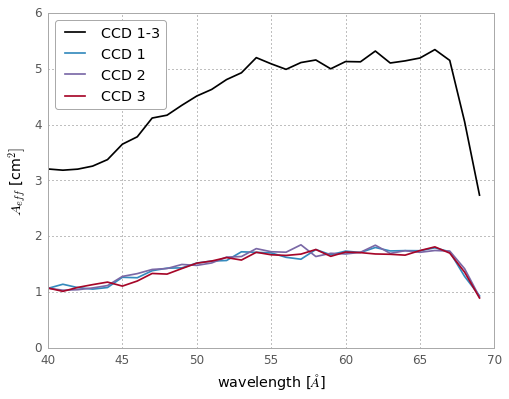

In [32]:
plot_aeff(aeff)

In [33]:
mirror.Ageom

641.22915253140536

In [34]:
aeff

array([[ 0.06774914,  0.00166114,  0.00166607,  0.00167058],
       [ 0.06356211,  0.001776  ,  0.00160989,  0.00157806],
       [ 0.06340474,  0.00168221,  0.00162341,  0.00168756],
       [ 0.06133397,  0.00163986,  0.00167303,  0.0017653 ],
       [ 0.05818732,  0.0016844 ,  0.00173884,  0.00183628],
       [ 0.0547476 ,  0.00197081,  0.00199484,  0.00172484],
       [ 0.05290926,  0.00195791,  0.00207293,  0.00186604],
       [ 0.05056675,  0.00215411,  0.0021895 ,  0.00207778],
       [ 0.04803956,  0.00222543,  0.00221576,  0.00205984],
       [ 0.0422392 ,  0.00223441,  0.00232938,  0.00221526],
       [ 0.04153254,  0.00236826,  0.0023033 ,  0.00236536],
       [ 0.03763009,  0.00242462,  0.00237131,  0.00242497],
       [ 0.03536696,  0.00243958,  0.00253461,  0.00252201],
       [ 0.03236496,  0.0026831 ,  0.00255086,  0.00245215],
       [ 0.03021527,  0.00266757,  0.00277188,  0.00266979],
       [ 0.02937768,  0.00265237,  0.00268428,  0.0025998 ],
       [ 0.02928955,  0.

In [36]:
modulation = -np.array([calculate_modulation(p, ccd_id=1) for p in modulationrays])

In [37]:
modulation

array([ 0.95134285,  0.95213007,  0.94915388,  0.94625962,  0.9469114 ,
        0.9485141 ,  0.93816836,  0.94001772,  0.93909006,  0.93937307,
        0.93414511,  0.93186416,  0.9310466 ,  0.92515522,  0.92224581,
        0.92308759,  0.92319498,  0.92017555,  0.90902666,  0.91277416,
        0.90938904,  0.90096601,  0.90779772,  0.90027588,  0.89306135,
        0.89473623,  0.88042957,  0.88823515,  0.90286929,  0.94421676])

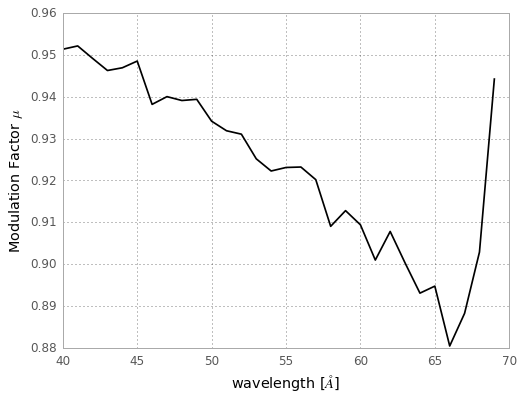

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(wave, modulation, 'k', label='CCD 1')
ax.set_xlabel('wavelength [$\AA{}$]')
ax.set_ylabel('Modulation Factor $\mu$')

In [39]:
merrit = modulation * np.sqrt(aeff[:, 1])

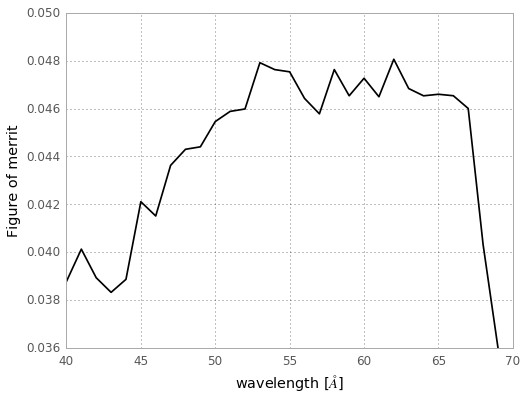

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(wave, merrit, 'k', label='CCD 1')
ax.set_xlabel('wavelength [$\AA{}$]')
ax.set_ylabel('Figure of merrit')

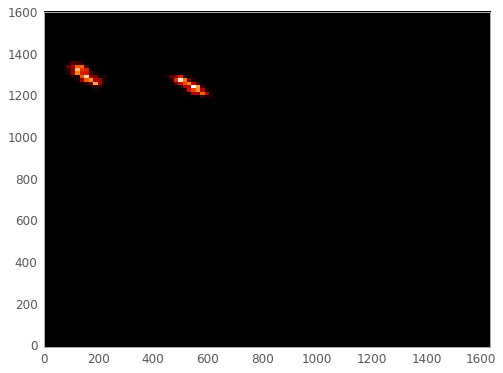

In [41]:
i = 1
photons = aeffrays[i]
ind = photons['CCD_ID'] == 1
out = plt.hist2d(photons['detpix_x'][ind], photons['detpix_y'][ind], weights=photons['probability'][ind],
                 range=[[0, 1632], [0, 1608]], bins=100)

In [230]:
point_fixed = Table.read(os.path.join(datadir, 'aeff', 'pointing_fixed.fits'))

In [231]:
sk = astropy.coordinates.SkyCoord.guess_from_table(point_fixed, unit='deg')

In [232]:
point_fixed['separation'] = sk.separation(astropy.coordinates.SkyCoord(30., 30., unit='deg')).arcsec

In [235]:
point_fixed.sort('separation')

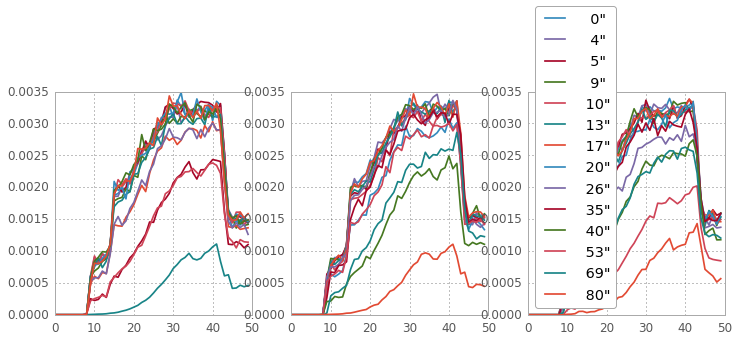

In [236]:
fig = plt.figure(figsize=(12, 4))
for j in [1,2,3]:
    ax = fig.add_subplot(1, 3, j)
    for i in range(len(point_fixed)):
        ax.plot(point_fixed[i]['Aeff'][:, j], label='{0:3.0f}"'.format(point_fixed['separation'][i]))
ax.legend()

(0.8, 1)

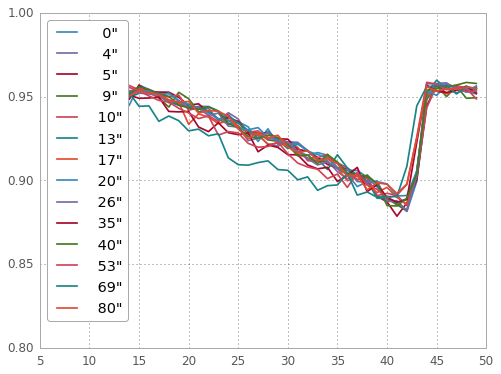

In [240]:
for i in range(len(point_fixed)):
    plt.plot(-point_fixed[i]['modulation'][:, 1], label='{0:3.0f}"'.format(point_fixed['separation'][i]))
plt.legend()
plt.ylim([0.8, 1])

In [241]:
point_jitter = Table.read(os.path.join(datadir, 'aeff', 'pointing_jitter.fits'))

In [242]:
point_jitter

jitter,"Aeff [50,4]","modulation [50,4]"
arcsec,,
float64,float64,float64
0.1,0.120761508198 .. 0.00150248663767,0.00254384204663 .. 0.39621558837
5.0,0.120635376273 .. 0.0015467318039,0.00203627340199 .. 0.431797053115
10.0,0.117685051497 .. 0.00150747079028,0.0047531165965 .. 0.426425742604
15.0,0.117267977693 .. 0.00158252656268,0.0127659788835 .. 0.38617108485
30.0,0.121210319716 .. 0.00138017114762,0.0125699049563 .. 0.414149011073
50.0,0.120795478067 .. 0.00139887155181,0.0110343898144 .. 0.384154701988
70.0,0.118506372957 .. 0.00133125258481,0.00314194938279 .. 0.384614801644
120.0,0.118247361804 .. 0.00126051684295,0.00285954064294 .. 0.434783217097


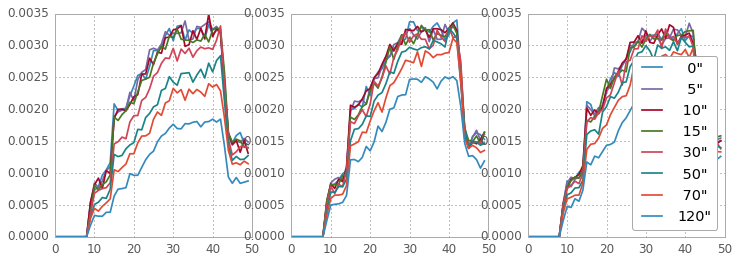

In [247]:
fig = plt.figure(figsize=(12, 4))
for j in [1,2,3]:
    ax = fig.add_subplot(1, 3, j)
    for i in range(len(point_jitter)):
        ax.plot(point_jitter[i]['Aeff'][:, j], label='{0:3.0f}"'.format(point_jitter['jitter'][i]))
ax.legend()


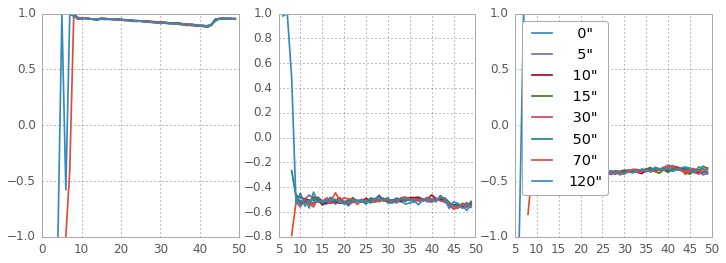

In [249]:
fig = plt.figure(figsize=(12, 4))
for j in [1,2,3]:
    ax = fig.add_subplot(1, 3, j)
    for i in range(len(point_jitter)):
        ax.plot(-point_jitter[i]['modulation'][:, j], label='{0:3.0f}"'.format(point_jitter['jitter'][i]))
ax.legend()

## Plots for the proposal

In [215]:
phot = Table.read(datadir + 'photons_spectrum.fits')
phot['wave'] = (phot['energy']).to(u.Angstrom, equivalencies=u.spectral())

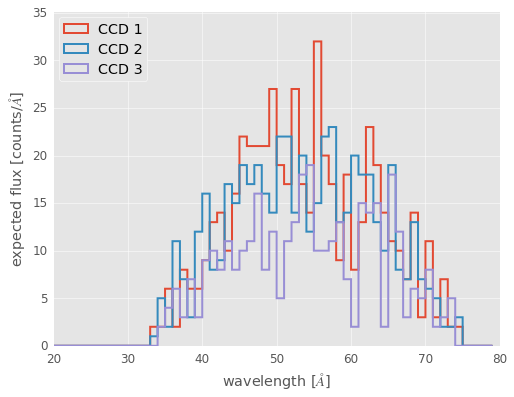

In [213]:
phot = phot[phot['probability'] > np.random.uniform(size=len(phot))]

with plt.style.context('ggplot'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    outmax = 0
    for i in [1, 2, 3]:
        ind = (phot['CCD_ID'] == i)
        out = ax.hist(phot['wave'][ind], histtype='step', #weights=phot['probability'][ind], 
                      bins=np.arange(20, 80), label='CCD {0}'.format(i), lw=2)
        outmax = np.max([outmax, np.max(out[0])])

    ax.set_ylim(0, outmax*1.1)
    ax.legend(loc='upper left')
    ax.set_xlabel('wavelength [$\AA$]')
    ax.set_ylabel('expected flux [counts/$\AA$]')
    fig.savefig(figureout + 'obsspec.pdf')

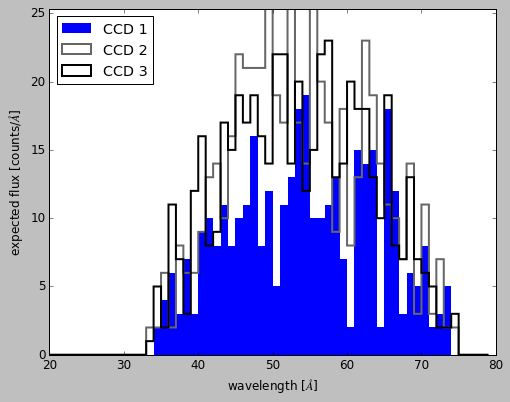

In [214]:
#phot = phot[phot['probability'] > np.random.uniform(size=len(phot))]

with plt.style.context('default'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    outmax = 0
    
    ind = (phot['CCD_ID'] == 3)
    out = ax.hist(phot['wave'][ind], #histtype='step', #weights=phot['probability'][ind], 
                      bins=np.arange(20, 80), label='CCD 1', lw=0)#, fc='y')
    ind = (phot['CCD_ID'] == 1)
    out = ax.hist(phot['wave'][ind], histtype='step', #weights=phot['probability'][ind], 
                      bins=np.arange(20, 80), label='CCD 2', lw=2, ec='0.4')
    ind = (phot['CCD_ID'] == 2)
    out = ax.hist(phot['wave'][ind], histtype='step', #weights=phot['probability'][ind], 
                      bins=np.arange(20, 80), label='CCD 3', lw=2, ec='k')
    outmax = np.max([outmax, np.max(out[0])])

    ax.set_ylim(0, outmax*1.1)
    ax.legend(loc='upper left')
    ax.set_xlabel('wavelength [$\AA$]')
    ax.set_ylabel('expected flux [counts/$\AA$]')
    fig.savefig(figureout + 'obsspec.pdf')

In [216]:
photdraw = phot[phot['probability'] > np.random.uniform(size=len(phot))]

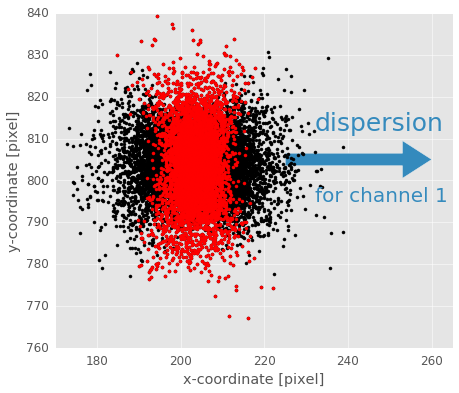

In [274]:
from matplotlib.patches import Arrow
with plt.style.context('ggplot'):
    fig = plt.figure()
    ax2 = fig.add_subplot(111, aspect='equal')
    ind = photdraw['CCD_ID'] == 0
    ax2.plot(photdraw['detpix_x'][ind], photdraw['detpix_y'][ind], 'k.', label='all photons')
    ind1 = photdraw['grating_id'] < 2000
    ax2.plot(photdraw['detpix_x'][ind & ind1], photdraw['detpix_y'][ind & ind1], 'r.', label='channel 1')
    arrow = Arrow(225, 805, 35, 0, width=15.)
    ax2.add_patch(arrow)
    ax2.text(232, 812., 'dispersion', color=arrow.get_fc(), fontsize=25)
    ax2.text(232, 795., 'for channel 1', color=arrow.get_fc(), fontsize=20)
    ax2.set_xlabel('x-coordinate [pixel]')
    ax2.set_ylabel('y-coordinate [pixel]')
    ax2.set_xlim(170, 265)
    #ax2.legend()
    fig.savefig(figureout + 'CCD0_image.pdf')

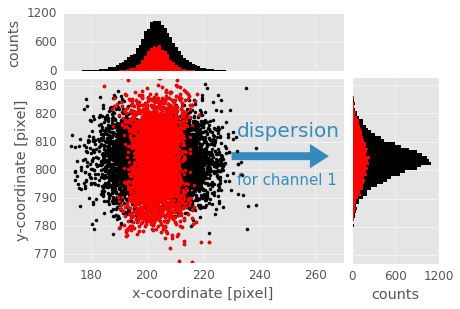

In [273]:
from matplotlib.ticker import NullFormatter, MaxNLocator

nullfmt = NullFormatter()         # no labels
max3loc = MaxNLocator(2)
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

with plt.style.context('ggplot'):
    # start with a rectangular Figure
    plt.figure(1, figsize=(6, 4))

    axScatter = plt.axes(rect_scatter, aspect='equal')
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    axHistx.yaxis.set_major_locator(max3loc)
    axHisty.xaxis.set_major_locator(max3loc)
    # the scatter plot:
    ind = photdraw['CCD_ID'] == 0
    axScatter.plot(photdraw['detpix_x'][ind], photdraw['detpix_y'][ind], 'k.', label='all photons')
    ind1 = photdraw['grating_id'] < 2000
    axScatter.plot(photdraw['detpix_x'][ind & ind1], photdraw['detpix_y'][ind & ind1], 'r.', label='channel 1')

    # now determine nice limits by hand:
    binwidth = 1
    xycenter = (220, 800)
    xywidth = (50, 33)
    
    arrow = Arrow(230, 805, 35, 0, width=15.)
    axScatter.add_patch(arrow)
    axScatter.text(232, 812., 'dispersion', color=arrow.get_fc(), fontsize=20)
    axScatter.text(232, 795., 'for channel 1', color=arrow.get_fc(), fontsize=15)
    axScatter.set_xlabel('x-coordinate [pixel]')
    axScatter.set_ylabel('y-coordinate [pixel]')

    axScatter.set_xlim((xycenter[0] - xywidth[0], xycenter[0] + xywidth[0]))
    axScatter.set_ylim((xycenter[1] - xywidth[1], xycenter[1] + xywidth[1]))

    xbins = np.arange(xycenter[0] - xywidth[0], xycenter[0] + xywidth[0], binwidth)
    ybins = np.arange(xycenter[1] - xywidth[1], xycenter[1] + xywidth[1], binwidth)
    axHistx.hist(photdraw['detpix_x'][ind], fc='k', bins=xbins, lw=0)
    axHistx.hist(photdraw['detpix_x'][ind & ind1], fc='r', bins=xbins, lw=0)
    axHisty.hist(photdraw['detpix_y'][ind], fc='k', bins=ybins, orientation='horizontal', lw=0)
    axHisty.hist(photdraw['detpix_y'][ind & ind1], fc='r', bins=ybins, orientation='horizontal', lw=0)
    axHistx.set_ylabel('counts')
    axHisty.set_xlabel('counts')
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    fig.savefig(figureout + 'CCD0_image_with_hist.pdf')

In [272]:
figureout

'/melkor/d1/guenther/Dropbox/REDSoX File Transfers/raytrace/plots/'

In [220]:
ind.sum()/300

53.726666666666667

(array([ 1152.,  1483.,  2008.,  2200.,  2008.,  1916.,  1622.,  1287.,
         1292.,  1150.]),
 array([ 0.1655773 ,  0.19841224,  0.23124719,  0.26408213,  0.29691707,
         0.32975202,  0.36258696,  0.3954219 ,  0.42825685,  0.46109179,
         0.49392674]),
 <a list of 10 Patch objects>)

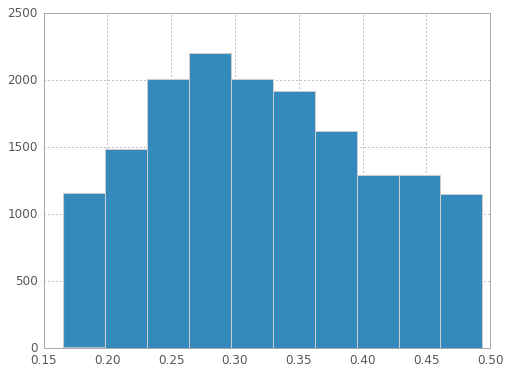

In [219]:
plt.hist(photdraw['energy'][ind])

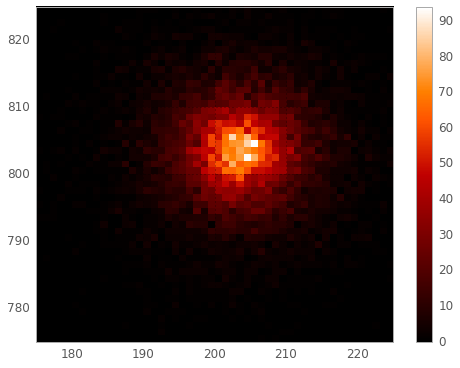

In [227]:
out = plt.hist2d(photdraw['detpix_x'][ind], photdraw['detpix_y'][ind], range=[[175, 225], [775, 825]], bins=50)
plt.colorbar()

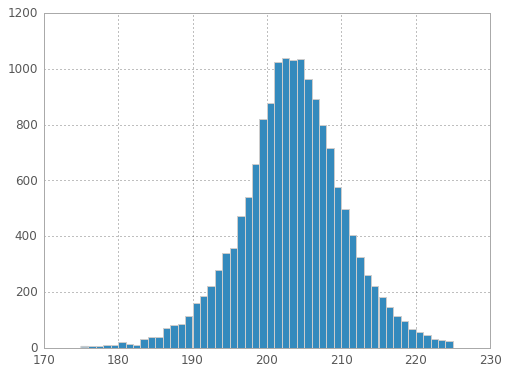

In [228]:
out = plt.hist(photdraw['detpix_x'][ind], range=[175, 225], bins=50)

# SPIE proceeding

\begin{abstract}
X-ray Polarimetry offers a new window into the high-energy universe, yet there has been no instrument so far that could measure the polarization of soft X-rays from astrophysical sources (about 17-80 Angstroem).
The Rocket Experiment Demonstration of a Soft X-ray Polarimeter (REDSoX Polarimeter) is a proposed sounding rocket experiment that uses a focusing optic and splits the beam in three channels. Each channel has a set of critical-angle transmission (CAT) gratings that disperse the signal onto a laterally graded multilayer mirror (LGML), which preferentially reflects photons with a specific polarization angle. The three channels are oriented at 120 deg to each other and thus measure the three Stokes parameters: I, Q, and U.
The period of the LGML changes with position. The main design challenge is to arrange the gratings so that they disperse the spectrum in such a way that all rays are dispersed onto the position on the multi-layer mirror where they satisfy the local Bragg condition despite arriving on the mirror at different angles due to the converging beam from the focussing optics.
We present a polarimeteric Monte-Carlo ray-trace of this design to assess non-ideal effects from the e.g. mirror scattering or the finite size of the grating facets, and to compute engineering tolerances for each component. With mirror properties both simulated and measured in the lab for LGMLss of 80-200 layers we show that the reflectivity and the width of the Bragg-peak are sufficient to make this design work when non-ideal effects are included in the simulation.

\end{abstract}

\keywords{ray-tracing, X-ray optics, critical angle transmission grating, REDSoX polarimeter, multi-layer mirror, polarimetry}

\section{INTRODUCTION}
\label{sect:introduction}

X-ray observations offer a unique way to study high-energy phenomena in the universe and there is a surprising number of science questions that require or at least benefit strongly from X-ray obserations. This includes such diverse objects as stars, interstellar gas, accreting neutron stars and low-mass black holes, and active galaxies powered by supermassive black holes. In the last few dacades our observational capabilities in the X-ray band have been ever expanding with more collecting area, and better temporal and spectral resolution over a wide band-pass. The last unexplored frontier is X-ray polarimetry, where little work has been done and essentially nothing is known below about 1~keV photon energy. Yet, X-ray polarimitry offers a new window to look at the most extreme sources. We expect X-rays to be polarized if they are generated in an environment with a preferred direction, such a the very strong magnetic field in magnetars or in relativistic jets. This background is discussed in more detail in a companion paper by Marshal et al. in the same volume \textbf{reference here}.

Here, we describe an instrument that can be used to measure the polarization in the soft X-ray band. In Sect.~\ref{sect:layout} we give an overview of the operating principle. In Sect.~\ref{sect:gratings} we derive the positioning of the gratings in the instrument analytically and we present ray-traces of this design in Sect.~\ref{sect:ray-trace} to include non-ideal effects such as the finite size of grating facets or uncertainties in the pointing direction into the derivation of effective area and figure of merrit. We discuss the limiting factors of the design in Sect.~\ref{sect:discussion} and end with a shot summary in Sect.~\ref{sect:summary}.

\section{LAYOUT OF REDSOX}
\label{sect:layout}

\section{POSITIONING THE GRATINGS}
\label{sect:gratings}

\section{RAY-TRACING}
\label{sect:ray-trace}

\section{DISCUSSION OF LIMITATIONS}
\label{sect:discussion}

\section{SUMMARY}
\label{sect:summary}

\acknowledgments % equivalent to \section*{ACKNOWLEDGMENTS}       
\texttt{ADD REDSOX grant here} 
Support for this work was provided by NASA through the Smithsonian
   Astrophysical Observatory (SAO) contract SV3-73016 to MIT for Support
   of the Chandra X-Ray Center (CXC) and Science Instruments. CXC is
   operated by SAO for and on behalf of NASA under contract NAS8-03060.


% References
\bibliography{../../my_articles/articles} 
\bibliographystyle{spiebib} % makes bibtex use spiebib.bst

\end{document} 